In [30]:
!pip3 install seaborn Jinja2 scikit-learn pandas numpy matplotlib

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
labels_df = pd.read_csv('train_labels.csv')

In [32]:
df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


In [33]:
labels_df

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


In [34]:
print("Shape of train data: ", df.shape)
print("\n")
df.info()

Shape of train data:  (26296946, 20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


In [35]:
print("Shape of train labels data: ", labels_df.shape)
print("\n")
labels_df.info()

Shape of train labels data:  (424116, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  424116 non-null  object
 1   correct     424116 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [2]:
# Feature engineering from scratch
def create_vocab_from_column(df, column_name, delimiter='.'):
    """
    Extracts unique tokens from a specified column by splitting each unique value based on a delimiter.
    
    Args:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The column from which to extract unique tokens.
    - delimiter (str): The delimiter to use for splitting values. Default is '.'.
    
    Returns:
    - set: A set of unique tokens.
    """
    # Get unique values from the specified column
    unique_values = df[column_name].unique()
    
    # Initialize an empty set to store the vocabulary
    vocab = set()

    # Loop through each unique value in the column
    for value in unique_values:
        # Split the value by the delimiter and add each part to the vocabulary set
        split_values = str(value).split(delimiter)
        for part in split_values:
            vocab.add(part)
    
    return vocab


def encode_vocab(vocab):
    """
    Encodes each unique string in the vocabulary to a unique integer.

    Args:
    - vocab (set): A set of unique strings.

    Returns:
    - dict: A dictionary where keys are the strings and values are their corresponding integer encodings.
    """
    # Sort the vocab set to ensure consistency in the encoding
    sorted_vocab = sorted(vocab)

    # Create a dictionary that maps each string to a unique integer
    encoding_dict = {string: idx for idx, string in enumerate(sorted_vocab)}

    return encoding_dict


def encode_column(df, column_name, encoding_dict, delimiter='.', pad_length=3):
    """
    Encodes the values in the specified column based on the provided encoding dictionary.
    Each token will be padded to a fixed length to avoid ambiguity when concatenating.

    Args:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The column to encode (e.g., 'room_fqid').
    - encoding_dict (dict): A dictionary that maps each token to a unique integer.
    - delimiter (str): The delimiter used to split the column values. Default is '.'.
    - pad_length (int): The length to pad each encoded integer to. Default is 2.

    Returns:
    - pd.Series: A new encoded column with concatenated padded integer values.
    """
    # Function to encode and pad a single value
    def encode_and_pad(value):
        # Split the value by the delimiter
        tokens = str(value).split(delimiter)
        # Encode each token using the encoding dictionary and format with leading zeros
        encoded_tokens = [str(encoding_dict[token]).zfill(pad_length) for token in tokens]  # Adjust padding as needed
        # Join the encoded tokens back together
        return ''.join(encoded_tokens)

    # Apply the encoding function to the entire column
    encoded_column = df[column_name].apply(encode_and_pad)
    
    return encoded_column

In [3]:
room_fqid_vocab = create_vocab_from_column(df, 'room_fqid')
text_fqid_vocab = create_vocab_from_column(df, 'text_fqid')
room_fqid_vocab_encode = encode_vocab(room_fqid_vocab)
text_fqid_vocab_encode = encode_vocab(text_fqid_vocab)
df['room_fqid_encoded'] = encode_column(df, 'room_fqid', room_fqid_vocab_encode)
df['text_fqid_encoded'] = encode_column(df, 'text_fqid', text_fqid_vocab_encode)

In [38]:
print(len(room_fqid_vocab))
room_fqid_vocab

24


{'basement',
 'cage',
 'capitol_0',
 'capitol_1',
 'capitol_2',
 'center',
 'closet',
 'closet_dirty',
 'collection',
 'collection_flag',
 'drycleaner',
 'entry',
 'flaghouse',
 'frontdesk',
 'hall',
 'halloffame',
 'historicalsociety',
 'humanecology',
 'kohlcenter',
 'library',
 'microfiche',
 'stacks',
 'tunic',
 'wildlife'}

In [39]:
print(len(text_fqid_vocab))
text_fqid_vocab

149


{'afterteddy',
 'animals',
 'animals2',
 'archivist',
 'archivist_glasses',
 'badger',
 'basement',
 'beforeteddy',
 'bingo',
 'block',
 'block_0',
 'block_1',
 'block_badge',
 'block_badge_2',
 'block_magnify',
 'block_nelson',
 'block_tocollection',
 'block_tomap1',
 'block_tomap2',
 'boss',
 'businesscards',
 'cage',
 'capitol_0',
 'capitol_1',
 'capitol_2',
 'card_bingo',
 'center',
 'ch3start',
 'chap1_finale_c',
 'chap2_finale_c',
 'chap4_finale_c',
 'closet',
 'closet_dirty',
 'closeup',
 'coffee',
 'collection',
 'collection_flag',
 'colorbook',
 'concern',
 'confrontation',
 'confrontation_recap',
 'crane',
 'crane_ranger',
 'cs',
 'date',
 'deer',
 'directory',
 'done',
 'done2',
 'door_block_clean',
 'door_block_talk',
 'doorblock',
 'droppedbadge',
 'drycleaner',
 'entry',
 'expert',
 'face',
 'flag',
 'flag_girl',
 'flag_recap',
 'flaghouse',
 'found',
 'foundtheodora',
 'fox',
 'frontdesk',
 'glasses',
 'gramps',
 'groupconvo',
 'groupconvo_flag',
 'hall',
 'halloffame',


In [40]:
print(len(room_fqid_vocab_encode))
room_fqid_vocab_encode

24


{'basement': 0,
 'cage': 1,
 'capitol_0': 2,
 'capitol_1': 3,
 'capitol_2': 4,
 'center': 5,
 'closet': 6,
 'closet_dirty': 7,
 'collection': 8,
 'collection_flag': 9,
 'drycleaner': 10,
 'entry': 11,
 'flaghouse': 12,
 'frontdesk': 13,
 'hall': 14,
 'halloffame': 15,
 'historicalsociety': 16,
 'humanecology': 17,
 'kohlcenter': 18,
 'library': 19,
 'microfiche': 20,
 'stacks': 21,
 'tunic': 22,
 'wildlife': 23}

In [41]:
print(len(text_fqid_vocab_encode))
text_fqid_vocab_encode

149


{'afterteddy': 0,
 'animals': 1,
 'animals2': 2,
 'archivist': 3,
 'archivist_glasses': 4,
 'badger': 5,
 'basement': 6,
 'beforeteddy': 7,
 'bingo': 8,
 'block': 9,
 'block_0': 10,
 'block_1': 11,
 'block_badge': 12,
 'block_badge_2': 13,
 'block_magnify': 14,
 'block_nelson': 15,
 'block_tocollection': 16,
 'block_tomap1': 17,
 'block_tomap2': 18,
 'boss': 19,
 'businesscards': 20,
 'cage': 21,
 'capitol_0': 22,
 'capitol_1': 23,
 'capitol_2': 24,
 'card_bingo': 25,
 'center': 26,
 'ch3start': 27,
 'chap1_finale_c': 28,
 'chap2_finale_c': 29,
 'chap4_finale_c': 30,
 'closet': 31,
 'closet_dirty': 32,
 'closeup': 33,
 'coffee': 34,
 'collection': 35,
 'collection_flag': 36,
 'colorbook': 37,
 'concern': 38,
 'confrontation': 39,
 'confrontation_recap': 40,
 'crane': 41,
 'crane_ranger': 42,
 'cs': 43,
 'date': 44,
 'deer': 45,
 'directory': 46,
 'done': 47,
 'done2': 48,
 'door_block_clean': 49,
 'door_block_talk': 50,
 'doorblock': 51,
 'droppedbadge': 52,
 'drycleaner': 53,
 'entry'

In [42]:
df[['room_fqid', 'room_fqid_encoded', 'text_fqid', 'text_fqid_encoded']].head()

,room_fqid,room_fqid_encoded,text_fqid,text_fqid_encoded
0,tunic.historicalsociety.closet,022016006,tunic.historicalsociety.closet.intro,139078031081
1,tunic.historicalsociety.closet,022016006,tunic.historicalsociety.closet.gramps.intro_0_...,139078031066082
2,tunic.historicalsociety.closet,022016006,tunic.historicalsociety.closet.gramps.intro_0_...,139078031066082
3,tunic.historicalsociety.closet,022016006,tunic.historicalsociety.closet.gramps.intro_0_...,139078031066082
4,tunic.historicalsociety.closet,022016006,tunic.historicalsociety.closet.gramps.intro_0_...,139078031066082


In [4]:
columns_to_remove = ['room_fqid', 'text_fqid']

df = df.drop(columns=columns_to_remove)

In [44]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,fullscreen,hq,music,level_group,room_fqid_encoded,text_fqid_encoded
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,0,0,1,0-4,022016006,139078031081
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,0,0,1,0-4,022016006,139078031066082
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,0,0,1,0-4,022016006,139078031066082
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,0,0,1,0-4,022016006,139078031066082
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,0,0,1,0-4,022016006,139078031066082


In [45]:
# numerical_features = df.select_dtypes(include=['float64', 'int64'])
# categorical_features = df.select_dtypes(include=['object'])

# print(f"There are {numerical_features.shape[1]} numerical features")
# print(f"There are {categorical_features.shape[1]} categorical features")

In [46]:
# # label encod the categorical features

# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}

# for column in categorical_features.columns:
#     if column == 'level_group':
#         continue
    
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le

# df.head()

In [5]:
labels_df['session'] = labels_df.session_id.apply(lambda x: int(x.split('_')[0]) )
labels_df['q'] = labels_df.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [48]:
labels_df.head()

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [6]:
categorical_features = ['event_name', 'name', 'fqid', 'room_fqid_encoded', 'text_fqid_encoded']
numerical_features = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

def feature_engineer(dataset_df):
    # Group by 'session_id' and 'level_group'
    grouped = dataset_df.groupby(['session_id', 'level_group'])

    # Calculate unique counts for categorical features
    categorical_agg = grouped[categorical_features].nunique().add_suffix('_nunique')

    # Calculate mean and standard deviation for numerical features
    numerical_agg = grouped[numerical_features].agg(['std', 'mean'])
    numerical_agg.columns = [f"{col}_{stat}" for col, stat in numerical_agg.columns]

    # Concatenate all aggregated features
    result = pd.concat([categorical_agg, numerical_agg], axis=1)

    # Fill missing values and reset index
    result.fillna(-1, inplace=True)
    result.reset_index(inplace=True)

    # Set session_id as index if required later
    result.set_index('session_id', inplace=True)

    return result

In [13]:
df.shape

(26296946, 20)

In [7]:
dataset = feature_engineer(df)
dataset.head()

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_encoded_nunique,text_fqid_encoded_nunique,elapsed_time_std,elapsed_time_mean,level_std,level_mean,...,room_coor_x_std,room_coor_x_mean,room_coor_y_std,room_coor_y_mean,screen_coor_x_std,screen_coor_x_mean,screen_coor_y_std,screen_coor_y_mean,hover_duration_std,hover_duration_mean
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,18,49246.539458,8.579356e+04,1.230975,1.945455,...,399.296040,7.701275,129.292411,-71.413749,214.871000,448.410256,104.082743,383.044872,3227.370757,2389.500000
20090312431273200,13-22,10,3,49,12,36,126666.129584,1.040601e+06,2.358652,17.402381,...,622.061375,-130.347170,230.370874,-162.004310,240.280218,442.489796,99.067861,379.301020,1305.088265,899.925926
20090312431273200,5-12,10,3,39,11,25,80175.676658,3.572052e+05,2.096919,8.054054,...,357.227700,14.306062,137.409476,-57.269322,203.268560,451.950943,120.255453,378.784906,1316.408315,969.333333
20090312433251036,0-4,11,4,22,6,12,67372.714092,9.763342e+04,1.232616,1.870504,...,445.980040,-84.045960,156.186242,-53.671082,252.554707,358.223077,121.062929,370.723077,2114.876406,1378.750000
20090312433251036,13-22,11,6,73,16,44,777382.529186,2.498852e+06,1.825923,17.762529,...,529.575656,-30.762282,234.279590,-142.861892,259.288856,462.852490,133.345693,387.930077,1990.705518,720.384921


In [52]:
dataset.shape

(70686, 22)

In [53]:
print(dataset.columns)

Index(['level_group', 'event_name_nunique', 'name_nunique', 'fqid_nunique',
       'room_fqid_encoded_nunique', 'text_fqid_encoded_nunique',
       'elapsed_time_std', 'elapsed_time_mean', 'level_std', 'level_mean',
       'page_std', 'page_mean', 'room_coor_x_std', 'room_coor_x_mean',
       'room_coor_y_std', 'room_coor_y_mean', 'screen_coor_x_std',
       'screen_coor_x_mean', 'screen_coor_y_std', 'screen_coor_y_mean',
       'hover_duration_std', 'hover_duration_mean'],
      dtype='object')


In [8]:
FEATURES = [c for c in dataset.columns if c != 'level_group']
print('We will train with', len(FEATURES) ,'features')

We will train with 21 features


In [9]:

from sklearn.model_selection import train_test_split   

train_x, test_x = train_test_split(dataset, test_size=0.2, random_state=42)   

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd

# Prepare for model training
models = {}
evaluation_dict = {}

# To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Logistic Regression Classifier with higher max_iter and 'saga' solver
    logreg = LogisticRegression(random_state=42, max_iter=5000)

    # Train the model
    logreg.fit(X_train, y_train)

    # Store the model
    models[f'{grp}_{q_no}'] = logreg

    # Make predictions and evaluate metrics
    y_pred = logreg.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # zero_division=1 handles division by zero
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the metrics for each question
    evaluation_dict[q_no] = accuracy
    metrics_dict['accuracy'].append(accuracy)
    metrics_dict['precision'].append(precision)
    metrics_dict['recall'].append(recall)
    metrics_dict['f1_score'].append(f1)
    metrics_dict['confusion_matrix'][q_no] = conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict['accuracy'],
    'Precision': metrics_dict['precision'],
    'Recall': metrics_dict['recall'],
    'F1-Score': metrics_dict['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question:\n")
print(classification_report_df)

# Calculate and print average metrics
avg_metrics = {
    'Accuracy': sum(metrics_dict['accuracy']) / 18,
    'Precision': sum(metrics_dict['precision']) / 18,
    'Recall': sum(metrics_dict['recall']) / 18,
    'F1-Score': sum(metrics_dict['f1_score']) / 18
}

# Print the average metrics
print("\nAverage Metrics Across All Questions:")
print(pd.DataFrame([avg_metrics]))

# Display confusion matrices for each question
for q_no, conf_matrix in metrics_dict['confusion_matrix'].items():
    print(f"\nConfusion Matrix for Question {q_no}:\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3297396125.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3297396125.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning


Classification Report for Each Question:

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.735374   0.736864  0.996038  0.847070
1          2  0.978555   0.979167  0.999362  0.989161
2          3  0.935249   0.935638  0.999555  0.966541
3          4  0.792163   0.793021  0.998635  0.884030
4          5  0.578913   0.584038  0.815033  0.680467
5          6  0.777008   0.778333  0.997496  0.874390
6          7  0.731760   0.732495  0.998522  0.845067
7          8  0.628924   0.629331  0.995519  0.771162
8          9  0.739338   0.739818  0.999122  0.850137
9         10  0.568088   0.556957  0.635412  0.593604
10        11  0.649058   0.650964  0.990664  0.785667
11        12  0.869019   0.869019  1.000000  0.929920
12        13  0.731327   0.285714  0.001616  0.003213
13        14  0.709288   0.710151  0.997310  0.829584
14        15  0.556404   0.545645  0.458959  0.498562
15        16  0.731764   0.731863  0.999710  0.845070
16        17  0.675148   0.675292  0.99

In [21]:
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

# Prepare for model training
models = {}
evaluation_dict = {}

# To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Set up Stratified K-Fold cross-validation
k_folds = 5  # You can adjust the number of folds here
stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Support Vector Machine Classifier
    svm = SVC(random_state=42, max_iter=5000)

    # Store metrics for this question
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []
    fold_conf_matrices = []

    # Stratified K-Fold Cross-Validation
    for train_idx, val_idx in stratified_kf.split(X_train, y_train):
        # Split the data into train and validation sets
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model on the training fold
        svm.fit(X_train_fold, y_train_fold)
        
        # Make predictions on the validation fold
        y_pred_fold = svm.predict(X_val_fold)
        
        # Calculate metrics for the fold
        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        precision = precision_score(y_val_fold, y_pred_fold, zero_division=1)
        recall = recall_score(y_val_fold, y_pred_fold, zero_division=1)
        f1 = f1_score(y_val_fold, y_pred_fold, zero_division=1)
        conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)
        
        # Store the metrics for this fold
        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1)
        fold_conf_matrices.append(conf_matrix)

    # Calculate average metrics across all folds
    avg_accuracy = np.mean(fold_accuracies)
    avg_precision = np.mean(fold_precisions)
    avg_recall = np.mean(fold_recalls)
    avg_f1_score = np.mean(fold_f1_scores)

    # Store the metrics for this question
    evaluation_dict[q_no] = avg_accuracy
    metrics_dict['accuracy'].append(avg_accuracy)
    metrics_dict['precision'].append(avg_precision)
    metrics_dict['recall'].append(avg_recall)
    metrics_dict['f1_score'].append(avg_f1_score)

    # Store the confusion matrix for each question (averaged over folds)
    avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
    metrics_dict['confusion_matrix'][q_no] = avg_conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict['accuracy'],
    'Precision': metrics_dict['precision'],
    'Recall': metrics_dict['recall'],
    'F1-Score': metrics_dict['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question:\n")
print(classification_report_df)

# Calculate and print average metrics
avg_metrics = {
    'Accuracy': np.mean(metrics_dict['accuracy']),
    'Precision': np.mean(metrics_dict['precision']),
    'Recall': np.mean(metrics_dict['recall']),
    'F1-Score': np.mean(metrics_dict['f1_score'])
}

# Print the average metrics
print("\nAverage Metrics Across All Questions:")
print(pd.DataFrame([avg_metrics]))

# Display averaged confusion matrices for each question
for q_no, conf_matrix in metrics_dict['confusion_matrix'].items():
    print(f"\nAveraged Confusion Matrix for Question {q_no}:\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\1953846908.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\1953846908.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver term


Classification Report for Each Question:

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.725252   0.725329  0.999853  0.840749
1          2  0.978730   0.978730  1.000000  0.989251
2          3  0.933579   0.933579  1.000000  0.965648
3          4  0.799345   0.799430  0.999868  0.888485
4          5  0.547379   0.548116  0.989593  0.705480
5          6  0.775379   0.775420  0.999932  0.873480
6          7  0.736895   0.736895  1.000000  0.848520
7          8  0.613102   0.614372  0.995018  0.759679
8          9  0.735258   0.735336  0.999856  0.847434
9         10  0.506783   0.507295  0.987105  0.670173
10        11  0.639497   0.642710  0.987835  0.778746
11        12  0.861479   0.861479  1.000000  0.925586
12        13  0.722906   0.650000  0.000191  0.000380
13        14  0.706887   0.707156  0.999400  0.828255
14        15  0.484931   0.482477  0.969452  0.644295
15        16  0.735488   0.735605  0.999784  0.847586
16        17  0.690597   0.690858  0.99

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Prepare for model training
models = {}
evaluation_dict = {}

# To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Resampling Methods Dictionary
resampling_methods = {
    'None': None,  # No resampling
    'SMOTE': SMOTE(random_state=42),
    'NearMiss': NearMiss(),
    'SMOTE + TomekLinks': SMOTEENN(smote=SMOTE(random_state=42), enn=TomekLinks()),
}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Iterate through resampling methods
    for resampling_method_name, resampling_method in resampling_methods.items():
        # Apply resampling method
        if resampling_method:
            X_resampled, y_resampled = resampling_method.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train  # No resampling

        # Initialize Support Vector Machine Classifier
        svm = SVC(random_state=42, max_iter=5000)

        # Train the model
        svm.fit(X_resampled, y_resampled)

        # Store the model
        models[f'{grp}_{q_no}_{resampling_method_name}'] = svm

        # Make predictions and evaluate metrics
        y_pred = svm.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store the metrics for each resampling method and question
        evaluation_dict[f'{q_no}_{resampling_method_name}'] = accuracy
        metrics_dict['accuracy'].append(accuracy)
        metrics_dict['precision'].append(precision)
        metrics_dict['recall'].append(recall)
        metrics_dict['f1_score'].append(f1)
        metrics_dict['confusion_matrix'][f'{q_no}_{resampling_method_name}'] = conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict['accuracy'],
    'Precision': metrics_dict['precision'],
    'Recall': metrics_dict['recall'],
    'F1-Score': metrics_dict['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question with Resampling:\n")
print(classification_report_df)

# Calculate and print average metrics
avg_metrics = {
    'Accuracy': sum(metrics_dict['accuracy']) / 18,
    'Precision': sum(metrics_dict['precision']) / 18,
    'Recall': sum(metrics_dict['recall']) / 18,
    'F1-Score': sum(metrics_dict['f1_score']) / 18
}

# Print the average metrics
print("\nAverage Metrics Across All Questions with Resampling:")
print(pd.DataFrame([avg_metrics]))

# Display confusion matrices for each question and resampling method
for key, conf_matrix in metrics_dict['confusion_matrix'].items():
    print(f"\nConfusion Matrix for {key}:\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3674762833.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3674762833.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver term

InvalidParameterError: The 'enn' parameter of SMOTEENN must be an instance of 'imblearn.under_sampling._prototype_selection._edited_nearest_neighbours.EditedNearestNeighbours' or None. Got TomekLinks() instead.

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Prepare for model training
models = {}
evaluation_dict = {}
metrics_dict = {'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}},
                'KNN': {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}},
                'Neural Network': {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}}

# Define classifiers
classifiers = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Train models for each question
for q_no in range(1, 19):
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Train and evaluate each model
    for model_name, classifier in classifiers.items():
        # Train the model
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store the metrics for each model and question
        metrics_dict[model_name]['accuracy'].append(accuracy)
        metrics_dict[model_name]['precision'].append(precision)
        metrics_dict[model_name]['recall'].append(recall)
        metrics_dict[model_name]['f1_score'].append(f1)
        metrics_dict[model_name]['confusion_matrix'][f'q{q_no}'] = conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'SVM Accuracy': metrics_dict['SVM']['accuracy'],
    'SVM Precision': metrics_dict['SVM']['precision'],
    'SVM Recall': metrics_dict['SVM']['recall'],
    'SVM F1-Score': metrics_dict['SVM']['f1_score'],
    
    'KNN Accuracy': metrics_dict['KNN']['accuracy'],
    'KNN Precision': metrics_dict['KNN']['precision'],
    'KNN Recall': metrics_dict['KNN']['recall'],
    'KNN F1-Score': metrics_dict['KNN']['f1_score'],
    
    'Neural Network Accuracy': metrics_dict['Neural Network']['accuracy'],
    'Neural Network Precision': metrics_dict['Neural Network']['precision'],
    'Neural Network Recall': metrics_dict['Neural Network']['recall'],
    'Neural Network F1-Score': metrics_dict['Neural Network']['f1_score']
})

# Print the classification report for each model across all questions
print("\nClassification Report for Each Model Across Questions:\n")
print(classification_report_df)

# Calculate and print average metrics for each model
avg_metrics = {
    'SVM Accuracy': sum(metrics_dict['SVM']['accuracy']) / 18,
    'SVM Precision': sum(metrics_dict['SVM']['precision']) / 18,
    'SVM Recall': sum(metrics_dict['SVM']['recall']) / 18,
    'SVM F1-Score': sum(metrics_dict['SVM']['f1_score']) / 18,

    'KNN Accuracy': sum(metrics_dict['KNN']['accuracy']) / 18,
    'KNN Precision': sum(metrics_dict['KNN']['precision']) / 18,
    'KNN Recall': sum(metrics_dict['KNN']['recall']) / 18,
    'KNN F1-Score': sum(metrics_dict['KNN']['f1_score']) / 18,

    'Neural Network Accuracy': sum(metrics_dict['Neural Network']['accuracy']) / 18,
    'Neural Network Precision': sum(metrics_dict['Neural Network']['precision']) / 18,
    'Neural Network Recall': sum(metrics_dict['Neural Network']['recall']) / 18,
    'Neural Network F1-Score': sum(metrics_dict['Neural Network']['f1_score']) / 18
}

# Print the average metrics for each model
print("\nAverage Metrics Across All Questions for Each Model:")
print(pd.DataFrame([avg_metrics]))

# Display confusion matrices for each model and question
for model_name, model_metrics in metrics_dict.items():
    for q_no, conf_matrix in model_metrics['confusion_matrix'].items():
        print(f"\nConfusion Matrix for {model_name} (Question {q_no}):\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3546137194.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3546137194.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3546137194.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe


Classification Report for Each Model Across Questions:

    Question  SVM Accuracy  SVM Precision  SVM Recall  SVM F1-Score  \
0          1      0.735790       0.735790    1.000000      0.847787   
1          2      0.979180       0.979180    1.000000      0.989480   
2          3      0.935665       0.935665    1.000000      0.966763   
3          4      0.793029       0.793201    0.999727      0.884569   
4          5      0.546872       0.549101    0.985832      0.705336   
5          6      0.777874       0.778042    0.999722      0.875061   
6          7      0.731760       0.732394    0.998818      0.845106   
7          8      0.628058       0.628225    0.998966      0.771360   
8          9      0.739554       0.739874    0.999415      0.850280   
9         10      0.501407       0.498877    0.969036      0.658663   
10        11      0.648842       0.649187    0.999000      0.786971   
11        12      0.869019       0.869019    1.000000      0.929920   
12        13      0.

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare for model training
models = {}
evaluation_dict = {}
metrics_dict = {'SVM': {'confusion_matrix': {}},
                'KNN': {'confusion_matrix': {}},
                'Neural Network': {'confusion_matrix': {}}}

# Define classifiers
classifiers = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Define resampling methods
resampling_methods = {
    'Original': None,
    'Undersample Majority Class': 'undersample',
    'SMOTE': SMOTE(random_state=42),
    'Hybrid (SMOTE + Tomek Links)': imPipeline([
        ('smote', SMOTE(random_state=42)),
        ('tomek', TomekLinks())
    ]),
    'NearMiss': NearMiss(version=1)
}

# Train models for each question and resampling method
for q_no in range(1, 19):
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Train and evaluate each model with different resampling methods
    for resample_name, resample_method in resampling_methods.items():
        if resample_method:  # Apply resampling if needed
            X_resampled, y_resampled = resample_method.fit_resample(X_train, y_train)
        else:  # No resampling
            X_resampled, y_resampled = X_train, y_train

        # Train and evaluate each model
        for model_name, classifier in classifiers.items():
            # Ensure metrics_dict is initialized for each model and resampling method
            if f'{resample_name} accuracy' not in metrics_dict[model_name]:
                metrics_dict[model_name][f'{resample_name} accuracy'] = []
                metrics_dict[model_name][f'{resample_name} precision'] = []
                metrics_dict[model_name][f'{resample_name} recall'] = []
                metrics_dict[model_name][f'{resample_name} f1_score'] = []

            # Train the model
            classifier.fit(X_resampled, y_resampled)

            # Make predictions
            y_pred = classifier.predict(X_test)
            
            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=1)
            recall = recall_score(y_test, y_pred, zero_division=1)
            f1 = f1_score(y_test, y_pred, zero_division=1)
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Store the metrics for each model and resampling method
            metrics_dict[model_name][f'{resample_name} accuracy'].append(accuracy)
            metrics_dict[model_name][f'{resample_name} precision'].append(precision)
            metrics_dict[model_name][f'{resample_name} recall'].append(recall)
            metrics_dict[model_name][f'{resample_name} f1_score'].append(f1)
            metrics_dict[model_name]['confusion_matrix'][f'{resample_name}_q{q_no}'] = conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'SVM Original Accuracy': metrics_dict['SVM']['Original accuracy'],
    'SVM Undersample Accuracy': metrics_dict['SVM']['Undersample Majority Class accuracy'],
    'SVM SMOTE Accuracy': metrics_dict['SVM']['SMOTE accuracy'],
    'SVM Hybrid (SMOTE + Tomek) Accuracy': metrics_dict['SVM']['Hybrid (SMOTE + Tomek Links) accuracy'],
    'SVM NearMiss Accuracy': metrics_dict['SVM']['NearMiss accuracy'],

    'KNN Original Accuracy': metrics_dict['KNN']['Original accuracy'],
    'KNN Undersample Accuracy': metrics_dict['KNN']['Undersample Majority Class accuracy'],
    'KNN SMOTE Accuracy': metrics_dict['KNN']['SMOTE accuracy'],
    'KNN Hybrid (SMOTE + Tomek) Accuracy': metrics_dict['KNN']['Hybrid (SMOTE + Tomek Links) accuracy'],
    'KNN NearMiss Accuracy': metrics_dict['KNN']['NearMiss accuracy'],

    'Neural Network Original Accuracy': metrics_dict['Neural Network']['Original accuracy'],
    'Neural Network Undersample Accuracy': metrics_dict['Neural Network']['Undersample Majority Class accuracy'],
    'Neural Network SMOTE Accuracy': metrics_dict['Neural Network']['SMOTE accuracy'],
    'Neural Network Hybrid (SMOTE + Tomek) Accuracy': metrics_dict['Neural Network']['Hybrid (SMOTE + Tomek Links) accuracy'],
    'Neural Network NearMiss Accuracy': metrics_dict['Neural Network']['NearMiss accuracy'],
})

# Print the classification report for each model and resampling method across questions
print("\nClassification Report for Each Model and Resampling Method Across Questions:\n")
print(classification_report_df)

# Calculate and print average metrics for each model and resampling method
avg_metrics = {}
for model_name in classifiers.keys():
    for resample_name in resampling_methods.keys():
        avg_metrics[f'{model_name} {resample_name} Accuracy'] = sum(metrics_dict[model_name].get(f'{resample_name} accuracy', [0])) / 18
        avg_metrics[f'{model_name} {resample_name} Precision'] = sum(metrics_dict[model_name].get(f'{resample_name} precision', [0])) / 18
        avg_metrics[f'{model_name} {resample_name} Recall'] = sum(metrics_dict[model_name].get(f'{resample_name} recall', [0])) / 18
        avg_metrics[f'{model_name} {resample_name} F1-Score'] = sum(metrics_dict[model_name].get(f'{resample_name} f1_score', [0])) / 18

# Print the average metrics for each model and resampling method
print("\nAverage Metrics Across All Questions for Each Model and Resampling Method:")
print(pd.DataFrame([avg_metrics]))

# Display confusion matrices for each model, resampling method, and question
for model_name, model_metrics in metrics_dict.items():
    for resample_name, resample_metrics in model_metrics.items():
        if resample_name != 'confusion_matrix':
            continue
        for q_no, conf_matrix in resample_metrics.items():
            print(f"\nConfusion Matrix for {model_name} ({resample_name}, Question {q_no}):\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\238887819.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\238887819.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


AttributeError: 'str' object has no attribute 'fit_resample'

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


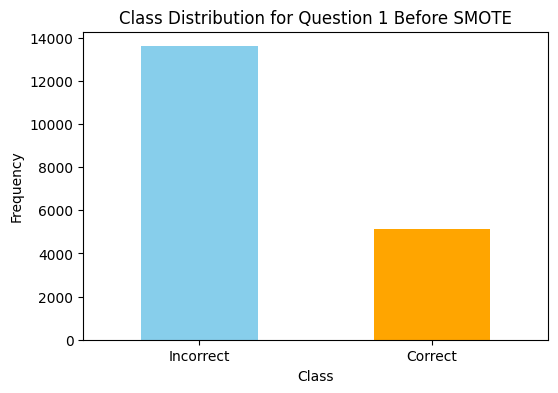

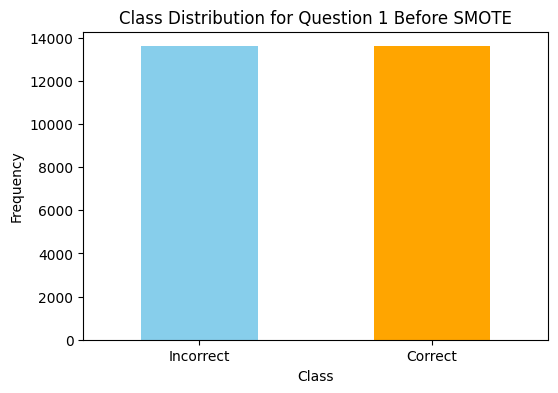

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

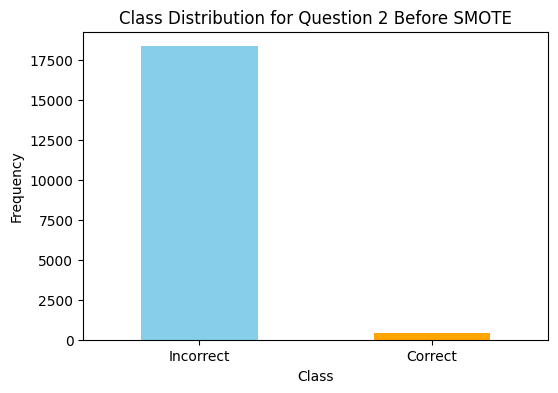

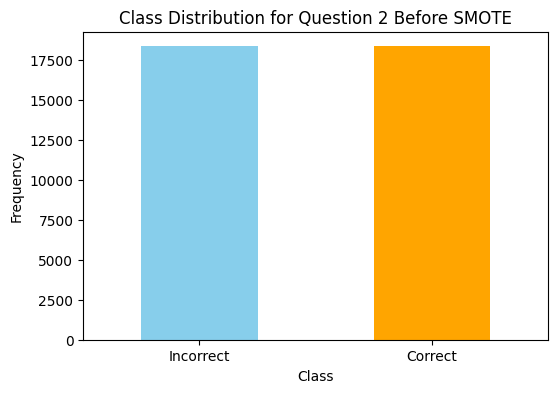

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

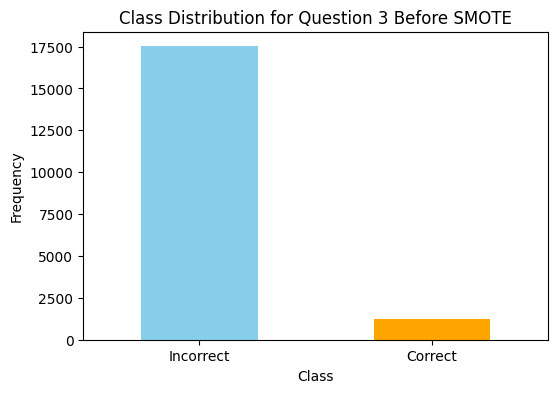

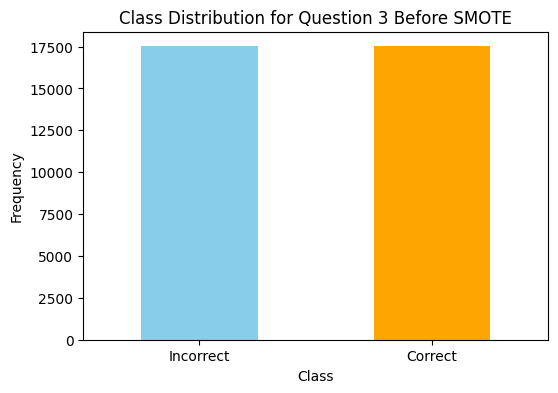

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

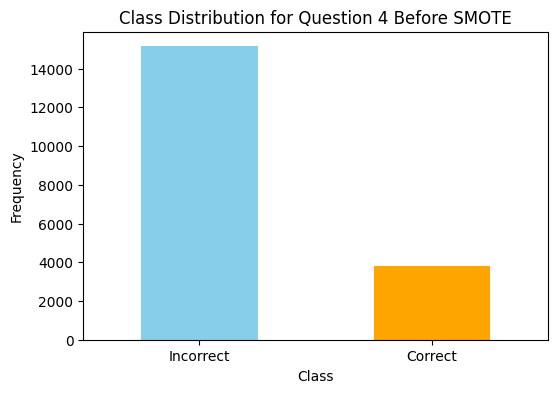

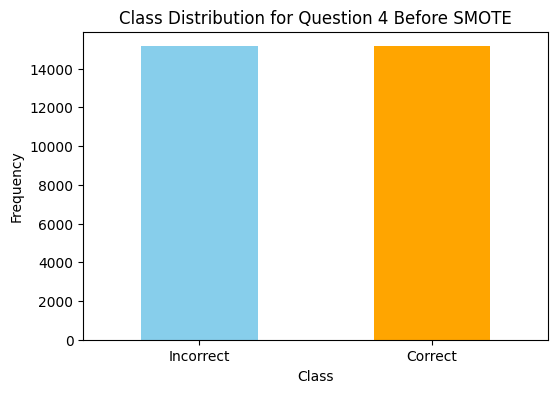

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

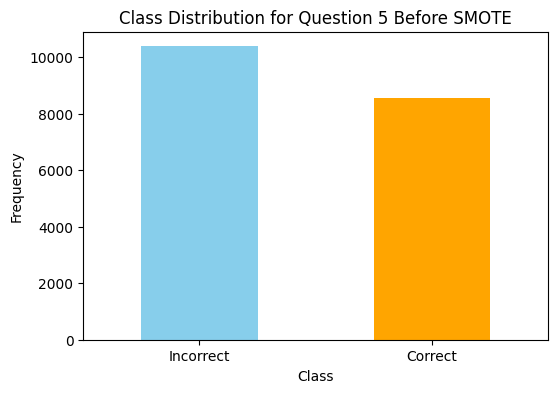

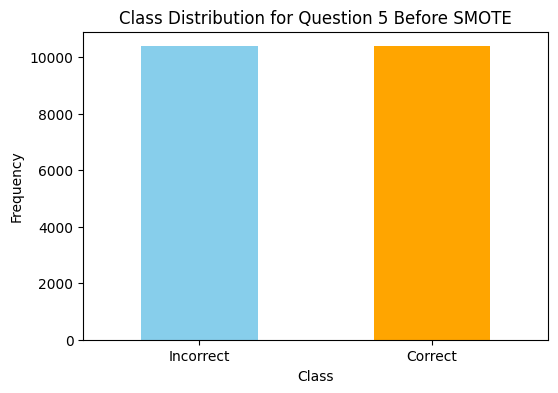

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

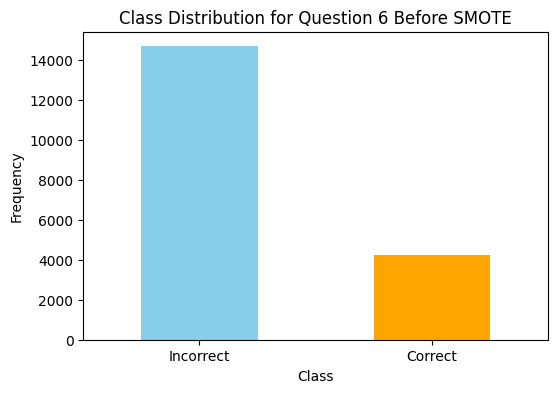

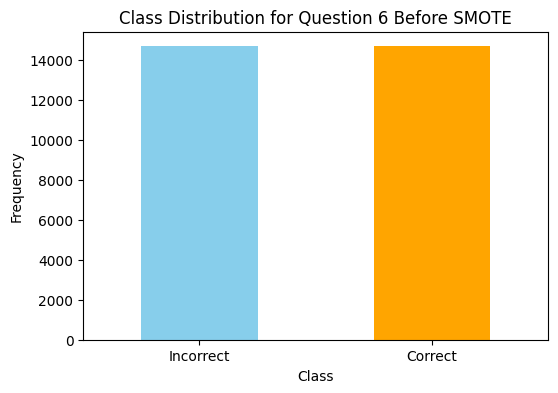

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

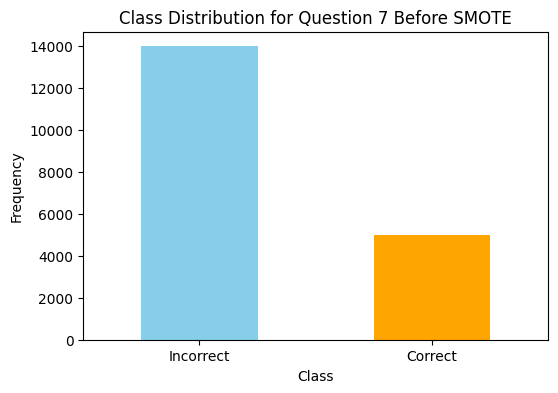

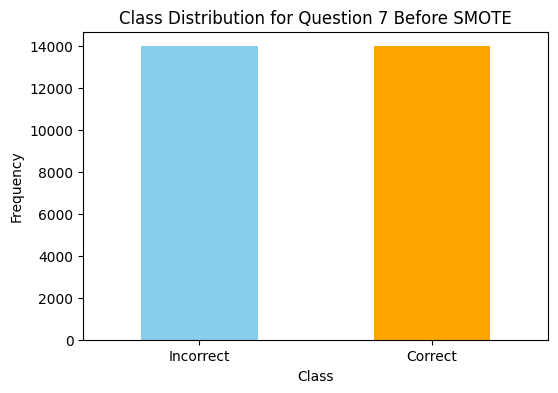

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


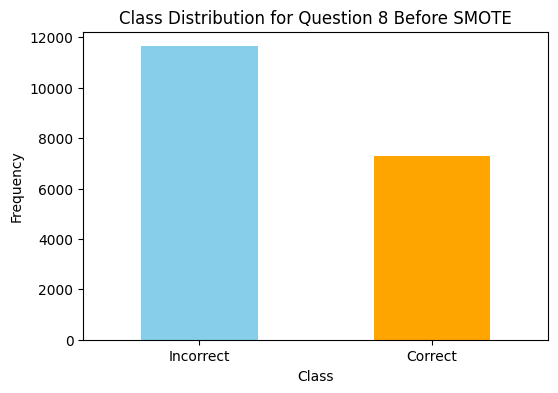

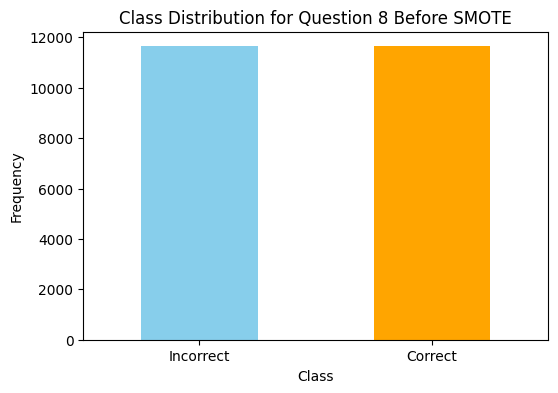

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


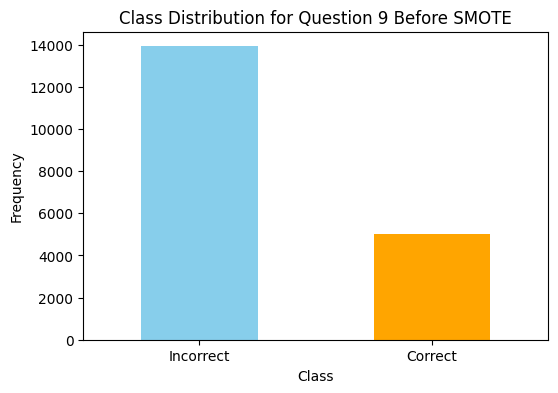

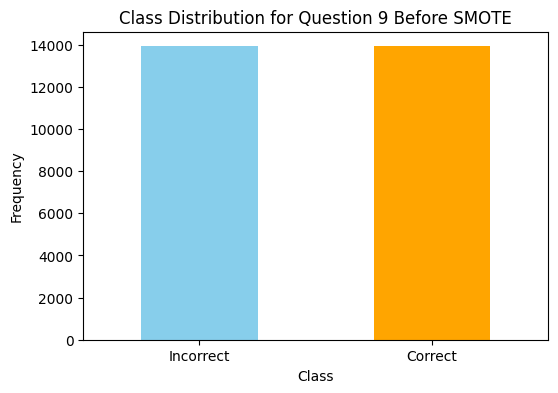

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


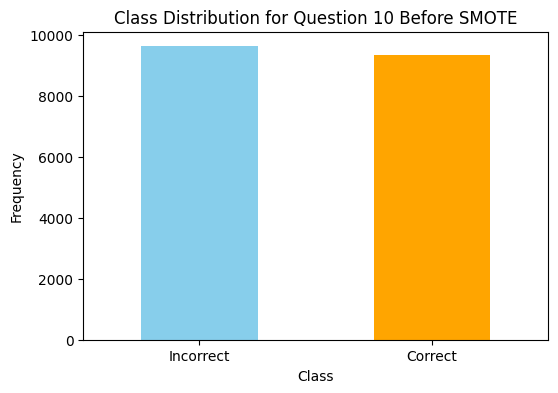

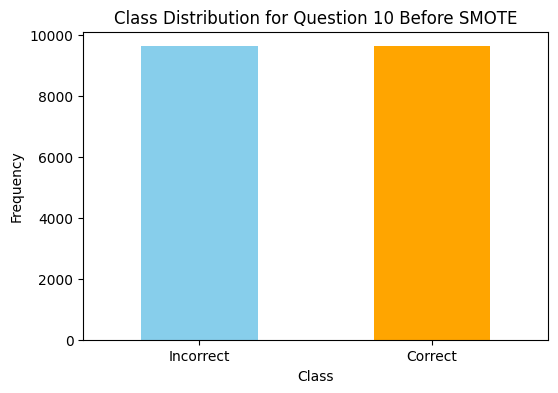

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

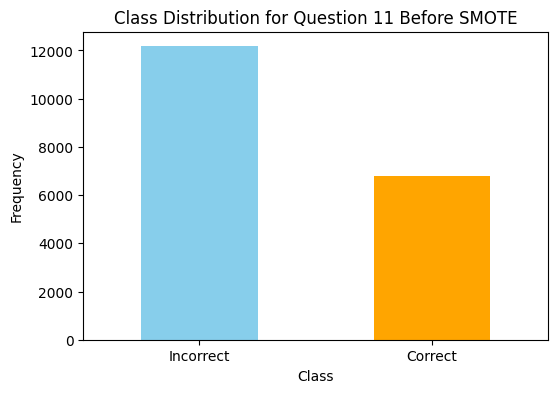

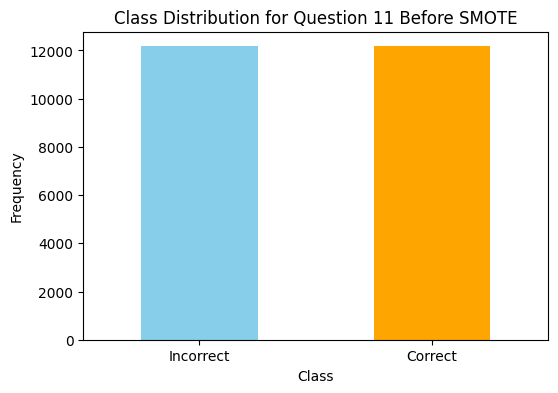

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

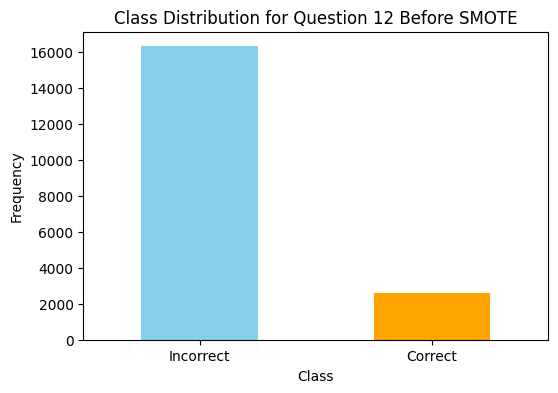

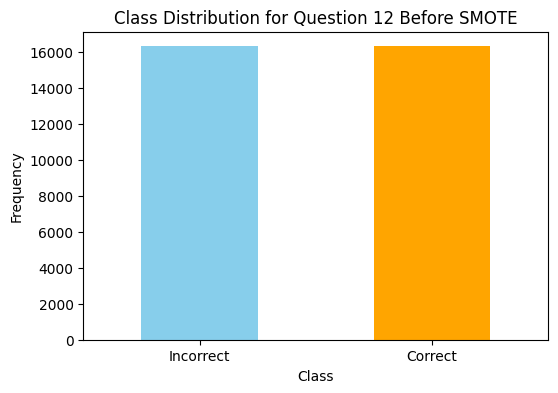

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


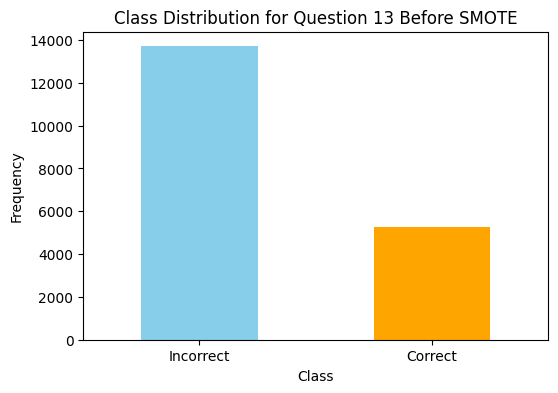

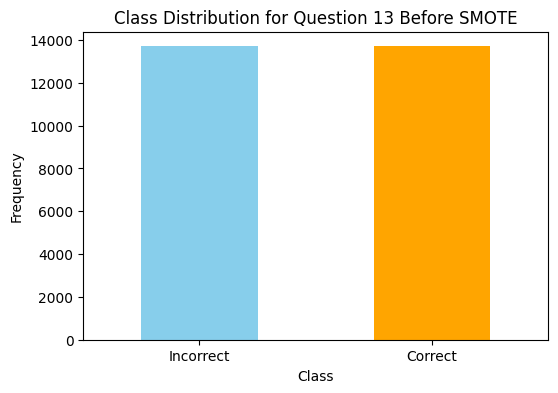

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels

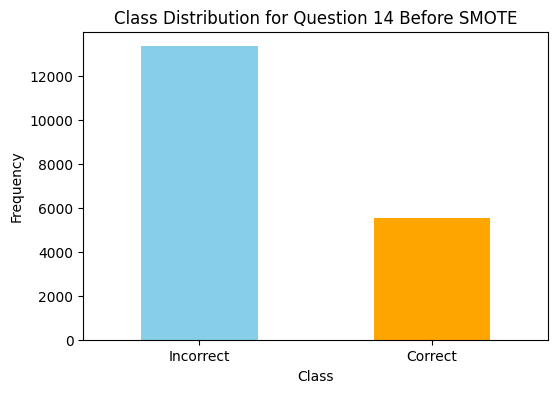

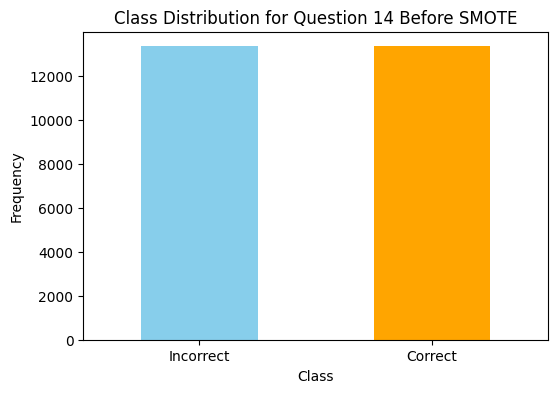

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


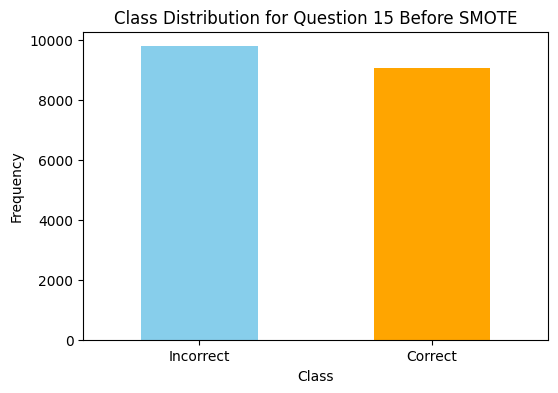

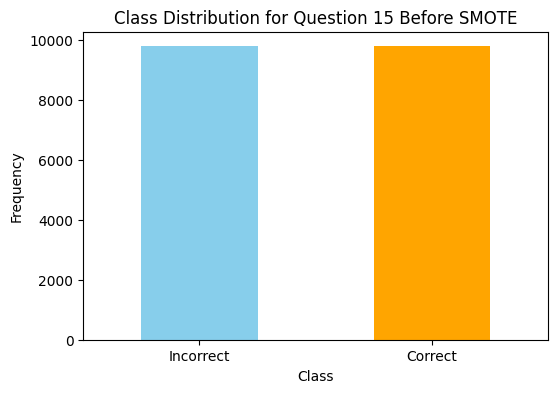

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


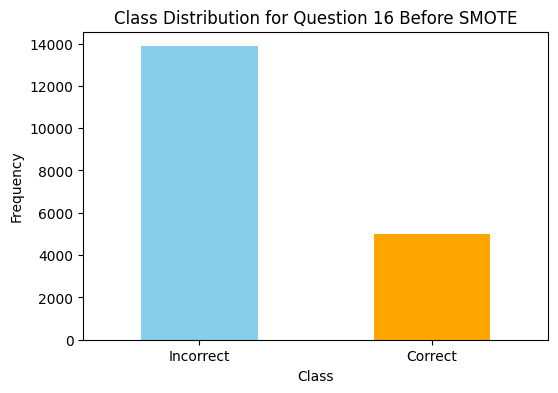

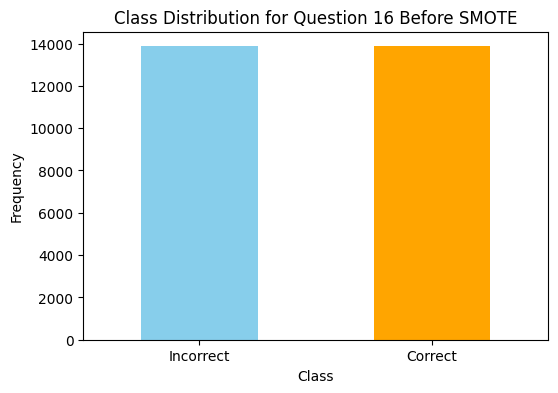

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


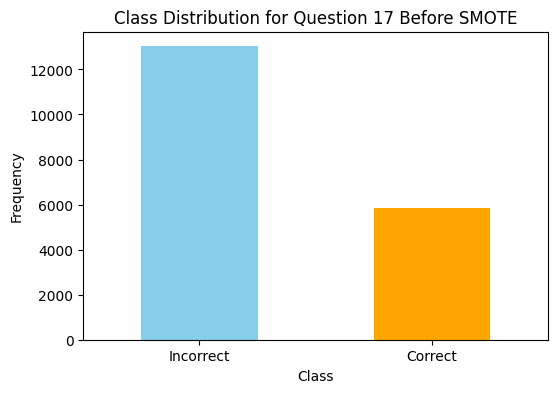

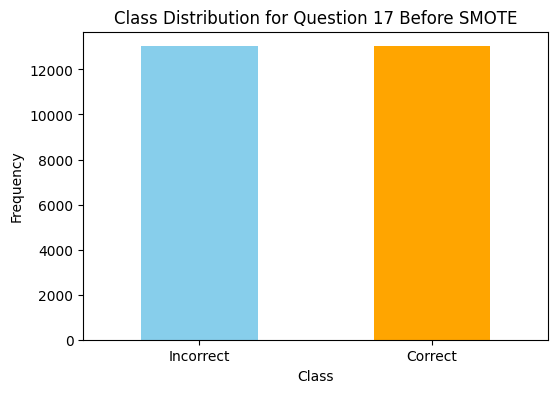

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\743141428.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]


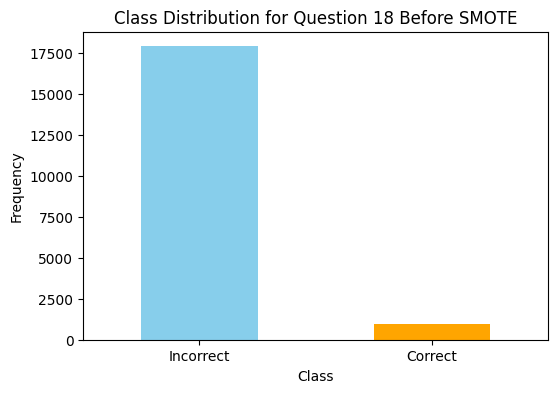

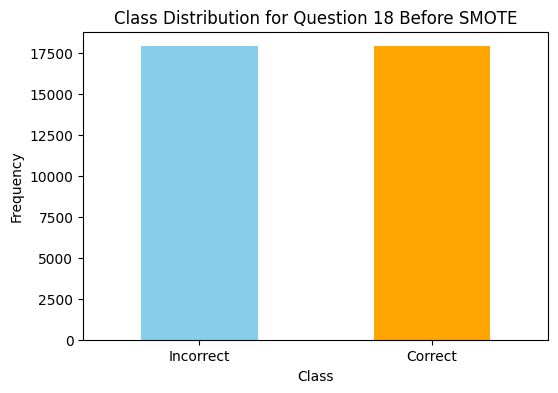


Classification Report for Each Question (After Applying SMOTE):

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.553612   0.781149  0.546406  0.643024
1          2  0.589423   0.982679  0.591112  0.738184
2          3  0.587966   0.955451  0.587005  0.727223
3          4  0.644512   0.838127  0.683952  0.753231
4          5  0.572202   0.615353  0.593074  0.604008
5          6  0.591470   0.821954  0.606288  0.697838
6          7  0.547521   0.761731  0.556442  0.643101
7          8  0.536047   0.659916  0.539124  0.593436
8          9  0.562026   0.781591  0.566413  0.656828
9         10  0.567655   0.561107  0.592673  0.576458
10        11  0.544707   0.684971  0.553184  0.612064
11        12  0.590171   0.899736  0.594669  0.716064
12        13  0.556181   0.320035  0.583199  0.413280
13        14  0.572307   0.764636  0.573819  0.655626
14        15  0.552375   0.532012  0.568402  0.549605
15        16  0.513147   0.735043  0.523327  0.611374
16        17  0.

In [ ]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Prepare for model training with SMOTE
models_smote = {}
evaluation_dict_smote = {}

# To store the metrics for each question
metrics_dict_smote = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Train models with SMOTE for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Visualize the class distribution of the original training dataset
    plt.figure(figsize=(6, 4))
    y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(f'Class Distribution for Question {q_no} Before SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Incorrect', 'Correct'], rotation=0)
    plt.show()

    # Apply SMOTE to the training dataset to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train the Logistic Regression model using the resampled data
    logreg = LogisticRegression(random_state=42, max_iter=5000)
    logreg.fit(X_train_resampled, y_train_resampled)

    # Store the model
    models_smote[f'{grp}_{q_no}'] = logreg

    # Make predictions and evaluate metrics
    y_pred = logreg.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # zero_division=1 handles division by zero
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the metrics for each question
    evaluation_dict_smote[q_no] = accuracy
    metrics_dict_smote['accuracy'].append(accuracy)
    metrics_dict_smote['precision'].append(precision)
    metrics_dict_smote['recall'].append(recall)
    metrics_dict_smote['f1_score'].append(f1)
    metrics_dict_smote['confusion_matrix'][q_no] = conf_matrix

# Create a classification report DataFrame for models with SMOTE
classification_report_smote_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict_smote['accuracy'],
    'Precision': metrics_dict_smote['precision'],
    'Recall': metrics_dict_smote['recall'],
    'F1-Score': metrics_dict_smote['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question (After Applying SMOTE):\n")
print(classification_report_smote_df)

# Calculate and print average metrics (After SMOTE)
avg_metrics_smote = {
    'Accuracy': sum(metrics_dict_smote['accuracy']) / 18,
    'Precision': sum(metrics_dict_smote['precision']) / 18,
    'Recall': sum(metrics_dict_smote['recall']) / 18,
    'F1-Score': sum(metrics_dict_smote['f1_score']) / 18
}

# Print the average metrics after applying SMOTE
print("\nAverage Metrics Across All Questions (After Applying SMOTE):")
print(pd.DataFrame([avg_metrics_smote]))

# Display confusion matrices for each question after applying SMOTE
for q_no, conf_matrix in metrics_dict_smote['confusion_matrix'].items():
    print(f"\nConfusion Matrix for Question {q_no} (After SMOTE):\n{conf_matrix}")


In [57]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare for model training
models_nb = {}
evaluation_dict_nb = {}

# To store the metrics for each question
metrics_dict_nb = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = valid_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Naive Bayes Classifier
    nb_classifier = GaussianNB()

    # Train the model
    nb_classifier.fit(X_train, y_train)

    # Store the model
    models_nb[f'{grp}_{q_no}'] = nb_classifier

    # Make predictions and evaluate metrics
    y_pred_nb = nb_classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    precision_nb = precision_score(y_test, y_pred_nb, zero_division=1)
    recall_nb = recall_score(y_test, y_pred_nb, zero_division=1)
    f1_nb = f1_score(y_test, y_pred_nb, zero_division=1)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
    
    # Store the metrics for each question
    evaluation_dict_nb[q_no] = accuracy_nb
    metrics_dict_nb['accuracy'].append(accuracy_nb)
    metrics_dict_nb['precision'].append(precision_nb)
    metrics_dict_nb['recall'].append(recall_nb)
    metrics_dict_nb['f1_score'].append(f1_nb)
    metrics_dict_nb['confusion_matrix'][q_no] = conf_matrix_nb

# Create a classification report DataFrame for Naive Bayes
classification_report_nb_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict_nb['accuracy'],
    'Precision': metrics_dict_nb['precision'],
    'Recall': metrics_dict_nb['recall'],
    'F1-Score': metrics_dict_nb['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question (Naive Bayes):\n")
print(classification_report_nb_df)

# Calculate and print average metrics
avg_metrics_nb = {
    'Accuracy': sum(metrics_dict_nb['accuracy']) / 18,
    'Precision': sum(metrics_dict_nb['precision']) / 18,
    'Recall': sum(metrics_dict_nb['recall']) / 18,
    'F1-Score': sum(metrics_dict_nb['f1_score']) / 18
}

# Print the average metrics
print("\nAverage Metrics Across All Questions (Naive Bayes):")
print(pd.DataFrame([avg_metrics_nb]))

# Display confusion matrices for each question
for q_no, conf_matrix_nb in metrics_dict_nb['confusion_matrix'].items():
    print(f"\nConfusion Matrix for Question {q_no} (Naive Bayes):\n{conf_matrix_nb}")


/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/522894996.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/522894996.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = valid_labels["correct"]
/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/522894996.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF


Classification Report for Each Question (Naive Bayes):

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.734125   0.736038  0.995756  0.846422
1          2  0.975848   0.979110  0.996598  0.987777
2          3  0.932750   0.936206  0.995995  0.965175
3          4  0.788049   0.794214  0.989083  0.881002
4          5  0.547521   0.549550  0.984258  0.705302
5          6  0.775493   0.780066  0.990818  0.872901
6          7  0.730894   0.732768  0.995863  0.844294
7          8  0.626976   0.628715  0.991727  0.769560
8          9  0.737822   0.739631  0.996489  0.849059
9         10  0.501624   0.378378  0.006106  0.012017
10        11  0.645378   0.649396  0.986329  0.783161
11        12  0.134878   0.909091  0.004983  0.009911
12        13  0.731760   0.400000  0.001616  0.003218
13        14  0.304707   0.713376  0.033473  0.063945
14        15  0.479432   0.479434  0.972198  0.642180
15        16  0.730280   0.732650  0.994205  0.843619
16        17  0.673452   

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare for model training
models_dt = {}
evaluation_dict_dt = {}

# To store the metrics for each question
metrics_dict_dt = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    valid_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = valid_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Store the model
    models_dt[f'{grp}_{q_no}'] = dt_classifier

    # Make predictions and evaluate metrics
    y_pred_dt = dt_classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt, zero_division=1)
    recall_dt = recall_score(y_test, y_pred_dt, zero_division=1)
    f1_dt = f1_score(y_test, y_pred_dt, zero_division=1)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
    
    # Store the metrics for each question
    evaluation_dict_dt[q_no] = accuracy_dt
    metrics_dict_dt['accuracy'].append(accuracy_dt)
    metrics_dict_dt['precision'].append(precision_dt)
    metrics_dict_dt['recall'].append(recall_dt)
    metrics_dict_dt['f1_score'].append(f1_dt)
    metrics_dict_dt['confusion_matrix'][q_no] = conf_matrix_dt

# Create a classification report DataFrame for Decision Trees
classification_report_dt_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict_dt['accuracy'],
    'Precision': metrics_dict_dt['precision'],
    'Recall': metrics_dict_dt['recall'],
    'F1-Score': metrics_dict_dt['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question (Decision Tree):\n")
print(classification_report_dt_df)

# Calculate and print average metrics
avg_metrics_dt = {
    'Accuracy': sum(metrics_dict_dt['accuracy']) / 18,
    'Precision': sum(metrics_dict_dt['precision']) / 18,
    'Recall': sum(metrics_dict_dt['recall']) / 18,
    'F1-Score': sum(metrics_dict_dt['f1_score']) / 18
}

# Print the average metrics
print("\nAverage Metrics Across All Questions (Decision Tree):")
print(pd.DataFrame([avg_metrics_dt]))

# Display confusion matrices for each question
for q_no, conf_matrix_dt in metrics_dict_dt['confusion_matrix'].items():
    print(f"\nConfusion Matrix for Question {q_no} (Decision Tree):\n{conf_matrix_dt}")


/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/3042456191.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/3042456191.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = valid_labels["correct"]
/var/folders/h4/p4hh2z2d3f33jsrq77gptvjc0000gn/T/ipykernel_8749/3042456191.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da


Classification Report for Each Question (Decision Tree):

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.626275   0.750649  0.736842  0.743681
1          2  0.955653   0.980111  0.974484  0.977290
2          3  0.871122   0.938051  0.923231  0.930582
3          4  0.696038   0.812846  0.801310  0.807037
4          5  0.539727   0.581404  0.583235  0.582318
5          6  0.661182   0.789774  0.769338  0.779422
6          7  0.624594   0.751985  0.727541  0.739561
7          8  0.540810   0.640086  0.614271  0.626913
8          9  0.629574   0.755004  0.739321  0.747081
9         10  0.525222   0.521259  0.534671  0.527879
10        11  0.566789   0.667337  0.663555  0.665441
11        12  0.761637   0.871841  0.850772  0.861178
12        13  0.621996   0.310730  0.336834  0.323256
13        14  0.615564   0.729835  0.727436  0.728633
14        15  0.518660   0.499116  0.498235  0.498675
15        16  0.605174   0.732650  0.725007  0.728809
16        17  0.562553 

: 

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier  # Requires installation via pip
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd

# Prepare for model training
models = {}
evaluation_dict = {}

# To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

# Define the ensemble classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_estimators=100),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=50),
    'GradientBoosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Bagging': BaggingClassifier(random_state=42, n_estimators=100),
    'ExtraTrees': ExtraTreesClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)  # Suppress CatBoost verbose output
}

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'
    
    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Evaluate each classifier
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)

        # Store the model
        models[f'{clf_name}_{grp}_{q_no}'] = clf

        # Make predictions and evaluate metrics
        y_pred = clf.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)  # zero_division=1 handles division by zero
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store the metrics
        evaluation_key = f'{clf_name}_{q_no}'
        evaluation_dict[evaluation_key] = accuracy
        if clf_name not in metrics_dict:
            metrics_dict[clf_name] = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}

        metrics_dict[clf_name]['accuracy'].append(accuracy)
        metrics_dict[clf_name]['precision'].append(precision)
        metrics_dict[clf_name]['recall'].append(recall)
        metrics_dict[clf_name]['f1_score'].append(f1)
        metrics_dict[clf_name]['confusion_matrix'][q_no] = conf_matrix

# Create classification reports for each classifier
for clf_name in classifiers.keys():
    print(f"\nClassification Report for {clf_name}:\n")
    classification_report_df = pd.DataFrame({
        'Question': range(1, 19),
        'Accuracy': metrics_dict[clf_name]['accuracy'],
        'Precision': metrics_dict[clf_name]['precision'],
        'Recall': metrics_dict[clf_name]['recall'],
        'F1-Score': metrics_dict[clf_name]['f1_score']
    })
    print(classification_report_df)
    avg_metrics = {
        'Accuracy': sum(metrics_dict[clf_name]['accuracy']) / 18,
        'Precision': sum(metrics_dict[clf_name]['precision']) / 18,
        'Recall': sum(metrics_dict[clf_name]['recall']) / 18,
        'F1-Score': sum(metrics_dict[clf_name]['f1_score']) / 18
    }
    print(f"\nAverage Metrics for {clf_name}:")
    print(pd.DataFrame([avg_metrics]))

    # Display confusion matrices for each question
    for q_no, conf_matrix in metrics_dict[clf_name]['confusion_matrix'].items():
        print(f"\nConfusion Matrix for Question {q_no} ({clf_name}):\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\1534999884.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\1534999884.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: 


Classification Report for RandomForest:

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.731834   0.742339  0.973401  0.842311
1          2  0.979180   0.979180  1.000000  0.989480
2          3  0.935665   0.935665  1.000000  0.966763
3          4  0.798008   0.804324  0.984989  0.885536
4          5  0.610305   0.624958  0.729240  0.673084
5          6  0.779822   0.790792  0.974958  0.873271
6          7  0.731760   0.743032  0.968972  0.841093
7          8  0.612687   0.639628  0.877973  0.740084
8          9  0.745616   0.756460  0.967817  0.849185
9         10  0.603377   0.593661  0.637157  0.614640
10        11  0.641264   0.667082  0.893298  0.763792
11        12  0.868803   0.869151  0.999502  0.929780
12        13  0.735441   0.540816  0.085622  0.147838
13        14  0.717133   0.729785  0.954871  0.827292
14        15  0.604750   0.592287  0.569285  0.580558
15        16  0.729008   0.732605  0.991597  0.842650
16        17  0.671120   0.677300  0.979

In [12]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Generate all combinations of hyperparameters
param_combinations = list(product(param_grid['n_estimators'], 
                                   param_grid['max_depth'], 
                                   param_grid['min_samples_split'], 
                                   param_grid['min_samples_leaf']))

# Dictionary to store average metrics for each hyperparameter combination
hyperparam_results = []

# Iterate over all hyperparameter combinations
for n_estimators, max_depth, min_samples_split, min_samples_leaf in param_combinations:
    # Initialize metrics storage
    metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
    
    # Train and evaluate on each question
    for q_no in range(1, 19):
        # Select level group for each question
        if q_no <= 3:
            grp = '0-4'
        elif q_no <= 13:
            grp = '5-12'
        else:
            grp = '13-22'

        # Filter datasets
        train_df = train_x.loc[train_x.level_group == grp]
        train_users = train_df.index.values
        test_df = test_x.loc[test_x.level_group == grp]
        test_users = test_df.index.values

        # Get labels for each question
        train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
        valid_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

        # Add correct labels to dataset
        train_df["correct"] = train_labels["correct"]
        test_df["correct"] = valid_labels["correct"]

        # Prepare features and labels for training
        X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
        y_train = train_df["correct"]

        X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
        y_test = test_df["correct"]

        # Initialize Random Forest Classifier with the current hyperparameters
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        # Train the model
        rf_classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = rf_classifier.predict(X_test)

        # Calculate evaluation metrics
        metrics_dict['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics_dict['precision'].append(precision_score(y_test, y_pred, zero_division=1))
        metrics_dict['recall'].append(recall_score(y_test, y_pred, zero_division=1))
        metrics_dict['f1_score'].append(f1_score(y_test, y_pred, zero_division=1))

    # Compute average metrics for this hyperparameter combination
    avg_accuracy = sum(metrics_dict['accuracy']) / len(metrics_dict['accuracy'])
    avg_precision = sum(metrics_dict['precision']) / len(metrics_dict['precision'])
    avg_recall = sum(metrics_dict['recall']) / len(metrics_dict['recall'])
    avg_f1_score = sum(metrics_dict['f1_score']) / len(metrics_dict['f1_score'])

    # Store results
    hyperparam_results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'avg_accuracy': avg_accuracy,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1_score': avg_f1_score
    })

# Find the best hyperparameter combination based on average accuracy
best_hyperparams = max(hyperparam_results, key=lambda x: x['avg_accuracy'])

# Print the best hyperparameters and their average metrics
print("\nBest Hyperparameters Based on Average Accuracy:")
print(best_hyperparams)

# Optionally, convert the results to a DataFrame for better visualization
import pandas as pd
hyperparam_results_df = pd.DataFrame(hyperparam_results)
print("\nHyperparameter Tuning Results (Top 10 by Average Accuracy):")
print(hyperparam_results_df.sort_values(by='avg_accuracy', ascending=False).head(10))


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\2322891150.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\2322891150.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = valid_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\2322891150.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index


Best Hyperparameters Based on Average Accuracy:
{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'avg_accuracy': 0.7513926182157995, 'avg_precision': 0.748565979650458, 'avg_recall': 0.886797782584362, 'avg_f1_score': 0.789741551356178}

Hyperparameter Tuning Results (Top 10 by Average Accuracy):
     n_estimators  max_depth  min_samples_split  min_samples_leaf  \
125           200       10.0                 10                 4   
123           200       10.0                 10                 1   
119           200       10.0                  2                 4   
122           200       10.0                  5                 4   
124           200       10.0                 10                 2   
118           200       10.0                  2                 2   
87            100       10.0                 10                 1   
88            100       10.0                 10                 2   
120           200       10.0              

In [23]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

# Prepare for model training
models = {}
evaluation_dict = {}  # To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}  # Store metrics

# Set up Stratified K-Fold cross-validation
k_folds = 5  # You can adjust the number of folds here
stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'

    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Random Forest Classifier
    rf = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators =200, max_depth= 10, min_samples_split= 10, min_samples_leaf= 4)

    # Store metrics for this question
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []
    fold_conf_matrices = []

    # Stratified K-Fold Cross-Validation
    for train_idx, val_idx in stratified_kf.split(X_train, y_train):
        # Split the data into train and validation sets
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train the model on the training fold
        rf.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation fold
        y_pred_fold = rf.predict(X_val_fold)

        # Calculate metrics for the fold
        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        precision = precision_score(y_val_fold, y_pred_fold, zero_division=1)
        recall = recall_score(y_val_fold, y_pred_fold, zero_division=1)
        f1 = f1_score(y_val_fold, y_pred_fold, zero_division=1)
        conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)

        # Store the metrics for this fold
        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1)
        fold_conf_matrices.append(conf_matrix)

    # Calculate average metrics across all folds
    avg_accuracy = np.mean(fold_accuracies)
    avg_precision = np.mean(fold_precisions)
    avg_recall = np.mean(fold_recalls)
    avg_f1_score = np.mean(fold_f1_scores)

    # Store the metrics for this question
    evaluation_dict[q_no] = avg_accuracy
    metrics_dict['accuracy'].append(avg_accuracy)
    metrics_dict['precision'].append(avg_precision)
    metrics_dict['recall'].append(avg_recall)
    metrics_dict['f1_score'].append(avg_f1_score)

    # Store the confusion matrix for each question (averaged over folds)
    avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
    metrics_dict['confusion_matrix'][q_no] = avg_conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict['accuracy'],
    'Precision': metrics_dict['precision'],
    'Recall': metrics_dict['recall'],
    'F1-Score': metrics_dict['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question:\n")
print(classification_report_df)

# Calculate and print average metrics
avg_metrics = {
    'Accuracy': np.mean(metrics_dict['accuracy']),
    'Precision': np.mean(metrics_dict['precision']),
    'Recall': np.mean(metrics_dict['recall']),
    'F1-Score': np.mean(metrics_dict['f1_score'])
}

# Print the average metrics
print("\nAverage Metrics Across All Questions:")
print(pd.DataFrame([avg_metrics]))

# Display averaged confusion matrices for each question
for q_no, conf_matrix in metrics_dict['confusion_matrix'].items():
    print(f"\nAveraged Confusion Matrix for Question {q_no}:\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\57680346.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\57680346.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\57680346.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v


Classification Report for Each Question:

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.725039   0.727382  0.993166  0.839743
1          2  0.978730   0.978730  1.000000  0.989251
2          3  0.933579   0.933579  1.000000  0.965648
3          4  0.804255   0.807651  0.991217  0.890067
4          5  0.612680   0.616429  0.775752  0.686938
5          6  0.779919   0.786591  0.982844  0.873828
6          7  0.739006   0.744063  0.984454  0.847539
7          8  0.618857   0.623219  0.960574  0.755966
8          9  0.740907   0.747259  0.978679  0.847448
9         10  0.593201   0.586424  0.673982  0.627144
10        11  0.655281   0.661962  0.946736  0.779138
11        12  0.861374   0.861503  0.999816  0.925520
12        13  0.724278   0.546063  0.030321  0.057300
13        14  0.716598   0.722745  0.972239  0.829122
14        15  0.603895   0.586150  0.601676  0.593762
15        16  0.735328   0.735913  0.998557  0.847350
16        17  0.690597   0.690898  0.99

In [24]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np

# Prepare for model training
models = {}
evaluation_dict = {}  # To store the metrics for each question
metrics_dict = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': {}}  # Store metrics

# Set up Stratified K-Fold cross-validation
k_folds = 5  # You can adjust the number of folds here
stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Train models for each question
for q_no in range(1, 19):
    # Select level group for each question
    if q_no <= 3:
        grp = '0-4'
    elif q_no <= 13:
        grp = '5-12'
    else:
        grp = '13-22'

    # Filter datasets
    train_df = train_x.loc[train_x.level_group == grp]
    train_users = train_df.index.values
    test_df = test_x.loc[test_x.level_group == grp]
    test_users = test_df.index.values

    # Get labels for each question
    train_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[train_users]
    test_labels = labels_df.loc[labels_df.q == q_no].set_index('session').loc[test_users]

    # Add correct labels to dataset
    train_df["correct"] = train_labels["correct"]
    test_df["correct"] = test_labels["correct"]

    # Prepare features and labels for training
    X_train = train_df.loc[:, train_df.columns != 'level_group'].drop(columns=["correct"])
    y_train = train_df["correct"]

    X_test = test_df.loc[:, test_df.columns != 'level_group'].drop(columns=["correct"])
    y_test = test_df["correct"]

    # Initialize Random Forest Classifier
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    # Use cross-validation to evaluate the model
    # We will use the `cross_val_score` function to compute the accuracy, precision, recall, and F1 score
    # We need to create a custom function to calculate the precision, recall, and F1 score since cross_val_score only gives accuracy by default

    def evaluate_model(cv, X_train, y_train):
        fold_accuracies = []
        fold_precisions = []
        fold_recalls = []
        fold_f1_scores = []
        fold_conf_matrices = []

        for train_idx, val_idx in cv.split(X_train, y_train):
            # Split the data into train and validation sets
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Train the model on the training fold
            rf.fit(X_train_fold, y_train_fold)

            # Make predictions on the validation fold
            y_pred_fold = rf.predict(X_val_fold)

            # Calculate metrics for the fold
            accuracy = accuracy_score(y_val_fold, y_pred_fold)
            precision = precision_score(y_val_fold, y_pred_fold, zero_division=1)
            recall = recall_score(y_val_fold, y_pred_fold, zero_division=1)
            f1 = f1_score(y_val_fold, y_pred_fold, zero_division=1)
            conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)

            # Store the metrics for this fold
            fold_accuracies.append(accuracy)
            fold_precisions.append(precision)
            fold_recalls.append(recall)
            fold_f1_scores.append(f1)
            fold_conf_matrices.append(conf_matrix)

        # Calculate average metrics across all folds
        avg_accuracy = np.mean(fold_accuracies)
        avg_precision = np.mean(fold_precisions)
        avg_recall = np.mean(fold_recalls)
        avg_f1_score = np.mean(fold_f1_scores)

        return avg_accuracy, avg_precision, avg_recall, avg_f1_score, fold_conf_matrices

    # Evaluate the model
    avg_accuracy, avg_precision, avg_recall, avg_f1_score, fold_conf_matrices = evaluate_model(stratified_kf, X_train, y_train)

    # Store the metrics for this question
    evaluation_dict[q_no] = avg_accuracy
    metrics_dict['accuracy'].append(avg_accuracy)
    metrics_dict['precision'].append(avg_precision)
    metrics_dict['recall'].append(avg_recall)
    metrics_dict['f1_score'].append(avg_f1_score)

    # Store the confusion matrix for each question (averaged over folds)
    avg_conf_matrix = np.mean(fold_conf_matrices, axis=0)
    metrics_dict['confusion_matrix'][q_no] = avg_conf_matrix

# Create a classification report DataFrame
classification_report_df = pd.DataFrame({
    'Question': range(1, 19),
    'Accuracy': metrics_dict['accuracy'],
    'Precision': metrics_dict['precision'],
    'Recall': metrics_dict['recall'],
    'F1-Score': metrics_dict['f1_score']
})

# Print the classification report as a table
print("\nClassification Report for Each Question:\n")
print(classification_report_df)

# Calculate and print average metrics
avg_metrics = {
    'Accuracy': np.mean(metrics_dict['accuracy']),
    'Precision': np.mean(metrics_dict['precision']),
    'Recall': np.mean(metrics_dict['recall']),
    'F1-Score': np.mean(metrics_dict['f1_score'])
}

# Print the average metrics
print("\nAverage Metrics Across All Questions:")
print(pd.DataFrame([avg_metrics]))

# Display averaged confusion matrices for each question
for q_no, conf_matrix in metrics_dict['confusion_matrix'].items():
    print(f"\nAveraged Confusion Matrix for Question {q_no}:\n{conf_matrix}")


C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\940481614.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\940481614.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["correct"] = test_labels["correct"]
C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\940481614.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 


Classification Report for Each Question:

    Question  Accuracy  Precision    Recall  F1-Score
0          1  0.720614   0.732205  0.969354  0.834249
1          2  0.978730   0.978730  1.000000  0.989251
2          3  0.933365   0.933564  0.999772  0.965534
3          4  0.802407   0.810538  0.982501  0.888271
4          5  0.603178   0.618484  0.719570  0.665176
5          6  0.778546   0.789959  0.973177  0.872045
6          7  0.737687   0.749005  0.968622  0.844762
7          8  0.608827   0.629800  0.881894  0.734826
8          9  0.738162   0.751403  0.962312  0.843862
9         10  0.582854   0.584605  0.616057  0.599886
10        11  0.648630   0.667099  0.904077  0.767712
11        12  0.861004   0.861681  0.999020  0.925282
12        13  0.721586   0.483315  0.071129  0.123817
13        14  0.713786   0.727548  0.951681  0.824649
14        15  0.593707   0.581242  0.556795  0.568696
15        16  0.733100   0.736710  0.991561  0.845344
16        17  0.683063   0.692483  0.97